In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzip and explore the dataset structure
import os
import zipfile
import shutil
from pathlib import Path
import pandas as pd
import librosa
import soundfile as sf

# Current directory where the zip files are located
current_dir = "/content/drive/MyDrive/dl"
print(f"Current directory: {current_dir}")

# List all files in current directory
files = os.listdir(current_dir)
print(f"\nFiles in current directory: {files}")

# Find zip files
zip_files = [f for f in files if f.endswith('.zip')]
print(f"\nZip files found: {zip_files}")

# Create extraction directory
extract_dir = "/content/extracted_datasets"
os.makedirs(extract_dir, exist_ok=True)

Current directory: /content/drive/MyDrive/dl

Files in current directory: ['RAVDESS.zip', 'EmoDB.zip']

Zip files found: ['RAVDESS.zip', 'EmoDB.zip']


In [ ]:
# Extract each zip file
for zip_file in zip_files:
    zip_path = os.path.join(current_dir, zip_file)
    extract_path = os.path.join(extract_dir, zip_file.replace('.zip', ''))

    print(f"\nExtracting {zip_file}...")
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Successfully extracted to: {extract_path}")

        # Check what's inside the extracted folder
        extracted_files = os.listdir(extract_path)
        print(f"Contents: {extracted_files}")
    except Exception as e:
        print(f"Error extracting {zip_file}: {e}")

# Function to create visual directory tree
def create_directory_tree(path, prefix="", max_depth=4, current_depth=0):
    """Create a visual directory tree"""
    if current_depth > max_depth:
        return ""

    try:
        items = sorted(os.listdir(path))
        tree_string = ""

        for i, item in enumerate(items):
            item_path = os.path.join(path, item)
            is_last = i == len(items) - 1

            # Create the tree symbols
            if is_last:
                current_prefix = prefix + "└── "
                child_prefix = prefix + "    "
            else:
                current_prefix = prefix + "├── "
                child_prefix = prefix + "│   "

            if os.path.isdir(item_path):
                tree_string += f"{current_prefix}📁 {item}/\n"
                if current_depth < max_depth:
                    tree_string += create_directory_tree(item_path, child_prefix, max_depth, current_depth + 1)
            else:
                file_extension = os.path.splitext(item)[1]
                if file_extension == '.wav':
                    tree_string += f"{current_prefix}🎵 {item}\n"
                elif file_extension in ['.txt', '.csv']:
                    tree_string += f"{current_prefix}📄 {item}\n"
                else:
                    tree_string += f"{current_prefix}📄 {item}\n"

                # Add file size for small files
                try:
                    size = os.path.getsize(item_path)
                    if size < 1024 * 1024:  # Less than 1MB
                        tree_string += f"{child_prefix}   Size: {size/1024:.1f} KB\n"
                except:
                    pass

        return tree_string
    except Exception as e:
        return f"Error: {e}\n"

# Analyze EmoDB dataset structure
print("\n" + "="*60)
print("EmoDB Dataset Analysis:")
print("="*60)




Extracting RAVDESS.zip...
Successfully extracted to: /content/extracted_datasets/RAVDESS
Contents: ['Actor_12', 'Actor_01', 'Actor_09', 'Actor_07', 'Actor_11', 'Actor_21', 'Actor_15', 'Actor_24', 'audio_speech_actors_01-24', 'Actor_16', 'Actor_14', 'Actor_13', 'Actor_19', 'Actor_22', 'Actor_04', 'Actor_17', 'Actor_06', 'Actor_05', 'Actor_23', 'Actor_20', 'Actor_10', 'Actor_08', 'Actor_03', 'Actor_02', 'Actor_18']

Extracting EmoDB.zip...
Successfully extracted to: /content/extracted_datasets/EmoDB
Contents: ['wav']

EmoDB Dataset Analysis:


In [ ]:
emodb_path = os.path.join(extract_dir, "EmoDB")
if os.path.exists(emodb_path):
    print(create_directory_tree(emodb_path, "", max_depth=3))

    # Analyze EmoDB files
    print("\nEmoDB File Naming Convention Analysis:")
    print("-" * 40)

    emodb_files = []
    emotion_map = {
        'W': 'Anger',
        'L': 'Neutrality',
        'E': 'Disgust',
        'A': 'Fear',
        'F': 'Happiness',
        'T': 'Sadness'
    }

    # Collect all .wav files
    for root, _, files in os.walk(emodb_path):
        for file in files:
            if file.endswith('.wav'):
                emodb_files.append(file)

    print(f"Total WAV files: {len(emodb_files)}")

    # Analyze first 5 files as examples
    print("\nExample files and their breakdown:")
    for i, file in enumerate(emodb_files[:5]):
        print(f"\n{i+1}. {file}")
        try:
            # EmoDB format: [speaker][text][emotion].[rest]
            # For example: 03a01Fa.wav
            speaker = file[:2]        # First 2 chars: speaker ID (e.g., '03')
            text_code = file[2:5]     # Next 3 chars: text ID (e.g., 'a01')
            emotion_code = file[5]    # 6th char: emotion code (e.g., 'F')

            emotion = emotion_map.get(emotion_code, 'Unknown')

            print(f"   Speaker: {speaker}")
            print(f"   Text code: {text_code}")
            print(f"   Emotion code: {emotion_code} → {emotion}")
        except Exception as e:
            print(f"   Error parsing filename: {e}")

    # Count emotions in EmoDB
    emotion_counts = {}
    for file in emodb_files:
        try:
            emotion_code = file[5]
            emotion = emotion_map.get(emotion_code, 'Unknown')
            emotion_counts[emotion] = emotion_counts.get(emotion, 0) + 1
        except:
            pass

    print("\nEmotion distribution in EmoDB:")
    for emotion, count in sorted(emotion_counts.items()):
        print(f"   {emotion}: {count} files")



└── 📁 wav/
    ├── 🎵 03a01Fa.wav
    │      Size: 59.4 KB
    ├── 🎵 03a01Nc.wav
    │      Size: 50.4 KB
    ├── 🎵 03a01Wa.wav
    │      Size: 58.7 KB
    ├── 🎵 03a02Fc.wav
    │      Size: 62.7 KB
    ├── 🎵 03a02Nc.wav
    │      Size: 45.0 KB
    ├── 🎵 03a02Ta.wav
    │      Size: 54.3 KB
    ├── 🎵 03a02Wb.wav
    │      Size: 66.4 KB
    ├── 🎵 03a02Wc.wav
    │      Size: 46.9 KB
    ├── 🎵 03a04Ad.wav
    │      Size: 47.1 KB
    ├── 🎵 03a04Fd.wav
    │      Size: 53.1 KB
    ├── 🎵 03a04Lc.wav
    │      Size: 60.4 KB
    ├── 🎵 03a04Nc.wav
    │      Size: 48.8 KB
    ├── 🎵 03a04Ta.wav
    │      Size: 64.5 KB
    ├── 🎵 03a04Wc.wav
    │      Size: 63.9 KB
    ├── 🎵 03a05Aa.wav
    │      Size: 96.5 KB
    ├── 🎵 03a05Fc.wav
    │      Size: 99.9 KB
    ├── 🎵 03a05Nd.wav
    │      Size: 99.0 KB
    ├── 🎵 03a05Tc.wav
    │      Size: 109.3 KB
    ├── 🎵 03a05Wa.wav
    │      Size: 107.6 KB
    ├── 🎵 03a05Wb.wav
    │      Size: 92.6 KB
    ├── 🎵 03a07Fa.wav
    │      Size: 66.7 KB


In [ ]:
# Analyze RAVDESS dataset structure
print("\n" + "="*60)
print("RAVDESS Dataset Analysis:")
print("="*60)

ravdess_path = os.path.join(extract_dir, "RAVDESS")
if os.path.exists(ravdess_path):
    print(create_directory_tree(ravdess_path, "", max_depth=3))

    # Analyze RAVDESS files
    print("\nRAVDESS File Naming Convention Analysis:")
    print("-" * 40)

    ravdess_files = []
    emotion_map_ravdess = {
        '01': 'Neutrality',
        '02': 'Happiness',
        '03': 'Sadness',
        '04': 'Anger',
        '05': 'Fear',
        '06': 'Surprise',
        '07': 'Disgust'
    }

    # Collect all .wav files
    for root, _, files in os.walk(ravdess_path):
        for file in files:
            if file.endswith('.wav'):
                ravdess_files.append(file)

    print(f"Total WAV files: {len(ravdess_files)}")

    # Analyze first 5 files as examples
    print("\nExample files and their breakdown:")
    for i, file in enumerate(ravdess_files[:5]):
        print(f"\n{i+1}. {file}")
        try:
            # RAVDESS format: 03-01-06-01-02-01-12.wav
            parts = file.split('-')
            if len(parts) >= 7:
                modality = parts[0]         # 03 = speech
                vocal_channel = parts[1]    # 01 = full-AV
                emotion_code = parts[2]     # 01-07 emotion codes
                intensity = parts[3]        # 01=normal, 02=strong
                statement = parts[4]        # 01-02 statement
                repetition = parts[5]       # 01-02 repetition
                actor = parts[6].split('.')[0]  # 01-24 actor ID

                emotion = emotion_map_ravdess.get(emotion_code, 'Unknown')
                intensity_label = "Normal" if intensity == '01' else "Strong"

                print(f"   Modality: {modality}")
                print(f"   Emotion code: {emotion_code} → {emotion}")
                print(f"   Intensity: {intensity} → {intensity_label}")
                print(f"   Actor: {actor}")
        except Exception as e:
            print(f"   Error parsing filename: {e}")

    # Count emotions in RAVDESS
    emotion_counts_ravdess = {}
    for file in ravdess_files:
        try:
            parts = file.split('-')
            if len(parts) >= 3:
                emotion_code = parts[2]
                emotion = emotion_map_ravdess.get(emotion_code, 'Unknown')
                emotion_counts_ravdess[emotion] = emotion_counts_ravdess.get(emotion, 0) + 1
        except:
            pass

    print("\nEmotion distribution in RAVDESS:")
    for emotion, count in sorted(emotion_counts_ravdess.items()):
        print(f"   {emotion}: {count} files")

# Create a comparison of both datasets
print("\n" + "="*60)
print("Dataset Comparison Summary:")
print("="*60)

print("\nEmoDB vs RAVDESS:")
print("-" * 30)
print(f"EmoDB total files: {len(emodb_files)}")
print(f"RAVDESS total files: {len(ravdess_files)}")
print(f"Combined total: {len(emodb_files) + len(ravdess_files)}")

print("\nCommon emotions in both datasets:")
common_emotions = set(emotion_counts.keys()) & set(emotion_counts_ravdess.keys())
for emotion in sorted(common_emotions):
    emodb_count = emotion_counts.get(emotion, 0)
    ravdess_count = emotion_counts_ravdess.get(emotion, 0)
    total = emodb_count + ravdess_count
    print(f"   {emotion}: EmoDB={emodb_count}, RAVDESS={ravdess_count}, Total={total}")

# Create a sample file analysis for audio properties
print("\n" + "="*60)
print("Audio File Properties Analysis:")
print("="*60)

def analyze_audio_file(file_path):
    """Analyze audio file properties"""
    try:
        # Get info using soundfile
        info = sf.info(file_path)

        # Get audio data using librosa for additional analysis
        y, sr = librosa.load(file_path, sr=None)

        return {
            'filename': os.path.basename(file_path),
            'duration': info.duration,
            'samplerate': info.samplerate,
            'channels': info.channels,
            'frames': info.frames,
            'amplitude_mean': np.mean(np.abs(y)),
            'amplitude_max': np.max(np.abs(y))
        }
    except Exception as e:
        return {'error': str(e)}

# Analyze sample files from each dataset
if emodb_files:
    emodb_sample = os.path.join(emodb_path, emodb_files[0])
    print(f"\nEmoDB sample analysis ({os.path.basename(emodb_sample)}):")
    emodb_props = analyze_audio_file(emodb_sample)
    for key, value in emodb_props.items():
        if key != 'filename':
            print(f"   {key}: {value}")

if ravdess_files:
    ravdess_sample = os.path.join(ravdess_path, ravdess_files[0])
    print(f"\nRAVDESS sample analysis ({os.path.basename(ravdess_sample)}):")
    ravdess_props = analyze_audio_file(ravdess_sample)
    for key, value in ravdess_props.items():
        if key != 'filename':
            print(f"   {key}: {value}")

print("\n" + "="*60)
print("Dataset Structure Analysis Complete!")
print("="*60)


RAVDESS Dataset Analysis:
├── 📁 Actor_01/
│   ├── 🎵 03-01-01-01-01-01-01.wav
│   │      Size: 366.9 KB
│   ├── 🎵 03-01-01-01-01-02-01.wav
│   │      Size: 370.2 KB
│   ├── 🎵 03-01-01-01-02-01-01.wav
│   │      Size: 364.0 KB
│   ├── 🎵 03-01-01-01-02-02-01.wav
│   │      Size: 354.6 KB
│   ├── 🎵 03-01-02-01-01-01-01.wav
│   │      Size: 390.1 KB
│   ├── 🎵 03-01-02-01-01-02-01.wav
│   │      Size: 734.2 KB
│   ├── 🎵 03-01-02-01-02-01-01.wav
│   │      Size: 387.0 KB
│   ├── 🎵 03-01-02-01-02-02-01.wav
│   │      Size: 383.9 KB
│   ├── 🎵 03-01-02-02-01-01-01.wav
│   │      Size: 405.8 KB
│   ├── 🎵 03-01-02-02-01-02-01.wav
│   │      Size: 433.9 KB
│   ├── 🎵 03-01-02-02-02-01-01.wav
│   │      Size: 452.7 KB
│   ├── 🎵 03-01-02-02-02-02-01.wav
│   │      Size: 433.9 KB
│   ├── 🎵 03-01-03-01-01-01-01.wav
│   │      Size: 383.9 KB
│   ├── 🎵 03-01-03-01-01-02-01.wav
│   │      Size: 383.9 KB
│   ├── 🎵 03-01-03-01-02-01-01.wav
│   │      Size: 390.1 KB
│   ├── 🎵 03-01-03-01-02-02-01.wav
│   │  

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from torch.utils.data import Dataset, DataLoader
import soundfile as sf
from pathlib import Path
import random

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Configure device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Emotion labels (consistent with EmoDB and RAVDESS)
emotion_labels = ['Anger', 'Happiness', 'Sadness', 'Fear', 'Neutrality', 'Disgust']

# Dataset paths - update these to point to our extracted datasets
EMODB_PATH = '/content/extracted_datasets/EmoDB'
RAVDESS_PATH = '/content/extracted_datasets/RAVDESS'

# Parameters for audio processing
TARGET_SAMPLE_RATE = 22025
MAX_AUDIO_LENGTH = 10  # seconds
HOP_LENGTH = 256
N_FFT = 1024
N_MELS = 80

# Extract mel-spectrogram features
def extract_mel_spectrogram(audio_path, target_sr=TARGET_SAMPLE_RATE,
                          max_length=MAX_AUDIO_LENGTH):
    """Extract mel-spectrogram from audio file"""
    try:
        # Load audio file
        audio, sr = librosa.load(audio_path, sr=target_sr)

        # Pad or trim audio to fixed length
        target_length = target_sr * max_length
        if len(audio) < target_length:
            audio = np.pad(audio, (0, target_length - len(audio)))
        else:
            audio = audio[:target_length]

        # Extract mel-spectrogram
        mel_spec = librosa.feature.melspectrogram(y=audio,
                                                 sr=target_sr,
                                                 n_fft=N_FFT,
                                                 hop_length=HOP_LENGTH,
                                                 n_mels=N_MELS)

        # Convert to log scale (dB)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

        # Normalize using Z-score normalization
        mel_spec_normalized = (mel_spec_db - mel_spec_db.mean()) / mel_spec_db.std()

        return mel_spec_normalized

    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None



Using device: cuda


EmoDB dataset size: 456
RAVDESS dataset size: 2112
Combined dataset size: 2568


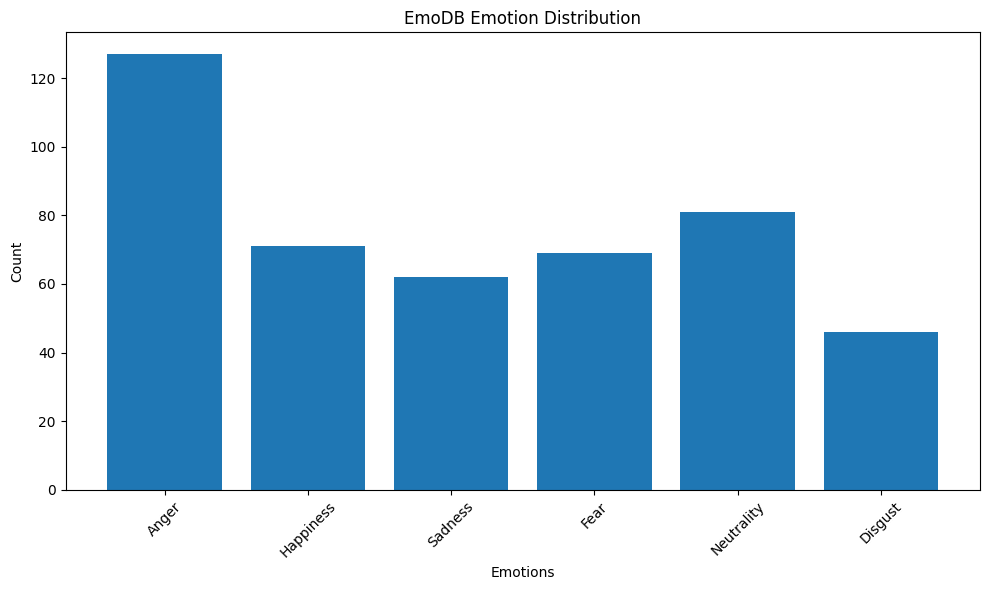

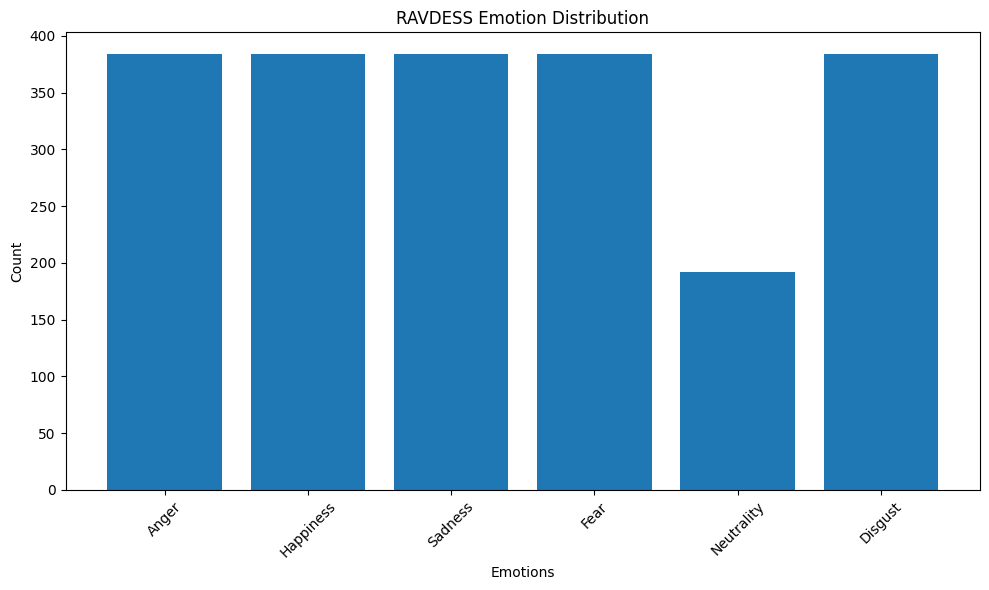

In [ ]:
# Custom Dataset class for emotion recognition
class EmotionDataset(Dataset):
    def __init__(self, dataset_type='EmoDB', transform=None):
        self.dataset_type = dataset_type
        self.transform = transform
        self.data = []
        self.labels = []

        # Load dataset
        if dataset_type == 'EmoDB':
            self._load_emodb()
        elif dataset_type == 'RAVDESS':
            self._load_ravdess()

    def _load_emodb(self):
        """Load EmoDB dataset"""
        emotion_map = {
            'W': 'Anger',
            'L': 'Neutrality',
            'E': 'Disgust',
            'A': 'Fear',
            'F': 'Happiness',
            'T': 'Sadness'
        }

        # Walk through the EmoDB directory
        for root, _, files in os.walk(EMODB_PATH):
            for file in files:
                if file.endswith('.wav'):
                    # Extract emotion from filename (EmoDB naming convention)
                    emotion_code = file[5]  # 7th character in EmoDB filename
                    if emotion_code in emotion_map:
                        emotion = emotion_map[emotion_code]
                        if emotion in emotion_labels:
                            file_path = os.path.join(root, file)
                            self.data.append(file_path)
                            self.labels.append(emotion_labels.index(emotion))

    def _load_ravdess(self):
        """Load RAVDESS dataset"""
        # RAVDESS filename format: 03-01-06-01-02-01-12.wav
        # Third number indicates emotion (01: calm, 02: happy, 03: sad, 04: angry, 05: fearful, 06: surprise, 07: disgust)
        emotion_map = {
            '01': 'Neutrality',  # Calm mapped to Neutrality
            '02': 'Happiness',
            '03': 'Sadness',
            '04': 'Anger',
            '05': 'Fear',
            '07': 'Disgust'  # Disgust without surprise
        }

        # Walk through the RAVDESS directory
        for root, _, files in os.walk(RAVDESS_PATH):
            for file in files:
                if file.endswith('.wav'):
                    # Extract emotion from filename
                    parts = file.split('-')
                    if len(parts) >= 3:
                        emotion_code = parts[2]
                        if emotion_code in emotion_map:
                            emotion = emotion_map[emotion_code]
                            if emotion in emotion_labels:
                                file_path = os.path.join(root, file)
                                self.data.append(file_path)
                                self.labels.append(emotion_labels.index(emotion))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        audio_path = self.data[idx]
        label = self.labels[idx]

        # Extract mel-spectrogram
        mel_spec = extract_mel_spectrogram(audio_path)

        if mel_spec is None:
            # Return zeros if extraction failed
            mel_spec = np.zeros((N_MELS, 862))  # 862 is typical width for our parameters

        # Convert to tensor
        mel_spec_tensor = torch.FloatTensor(mel_spec).unsqueeze(0)  # Add channel dimension

        if self.transform:
            mel_spec_tensor = self.transform(mel_spec_tensor)

        return mel_spec_tensor, torch.tensor(label, dtype=torch.long)

# Load both datasets
emodb_dataset = EmotionDataset(dataset_type='EmoDB')
ravdess_dataset = EmotionDataset(dataset_type='RAVDESS')

# Combine datasets
combined_dataset = torch.utils.data.ConcatDataset([emodb_dataset, ravdess_dataset])

# Print dataset information
print(f"EmoDB dataset size: {len(emodb_dataset)}")
print(f"RAVDESS dataset size: {len(ravdess_dataset)}")
print(f"Combined dataset size: {len(combined_dataset)}")

# Data distribution
def plot_distribution(dataset, title):
    labels = []
    for sample in dataset:
        labels.append(sample[1].item())

    emotion_counts = [labels.count(i) for i in range(len(emotion_labels))]

    plt.figure(figsize=(10, 6))
    plt.bar(emotion_labels, emotion_counts)
    plt.title(title)
    plt.xlabel('Emotions')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Check if datasets are loading correctly
if len(emodb_dataset) > 0:
    plot_distribution(emodb_dataset, 'EmoDB Emotion Distribution')
else:
    print("EmoDB dataset is empty. Check if files are correctly extracted.")

if len(ravdess_dataset) > 0:
    plot_distribution(ravdess_dataset, 'RAVDESS Emotion Distribution')
else:
    print("RAVDESS dataset is empty. Check if files are correctly extracted.")

# ResNet-based Emotion Recognition Model
class EmotionRecognitionModel(nn.Module):
    def __init__(self, num_emotions=6):
        super(EmotionRecognitionModel, self).__init__()

        # Initial convolution layer
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # Simplified ResNet blocks
        self.layer1 = self._make_layer(64, 64, 2)
        self.layer2 = self._make_layer(64, 128, 2, stride=2)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)

        # Average pooling and classification layer
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_emotions)

    def _make_layer(self, in_channels, out_channels, blocks, stride=1):
        layers = []
        layers.append(BasicBlock(in_channels, out_channels, stride))
        for _ in range(1, blocks):
            layers.append(BasicBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(x)
        out = self.relu(out)
        return out

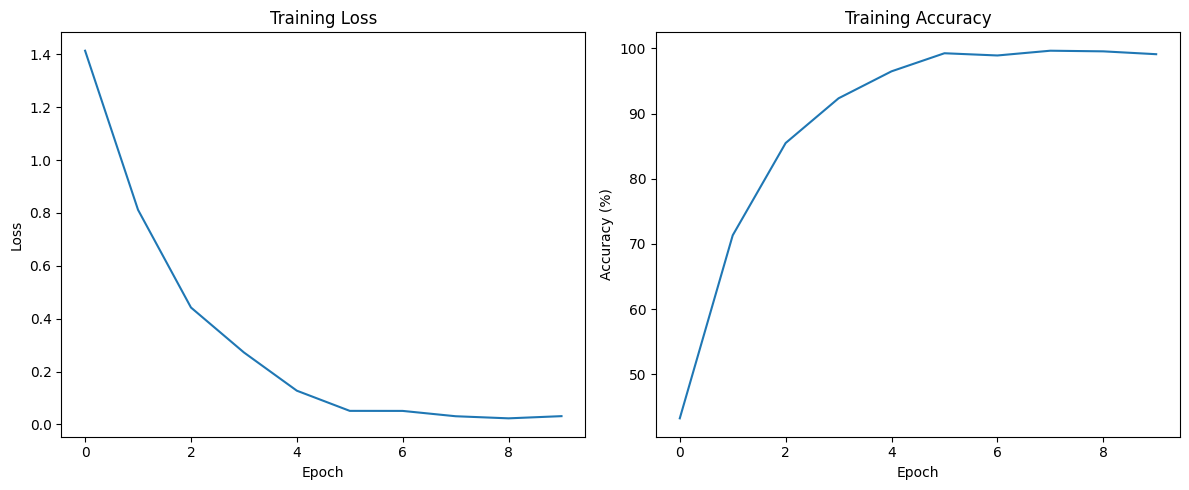

Test Accuracy: 80.54%


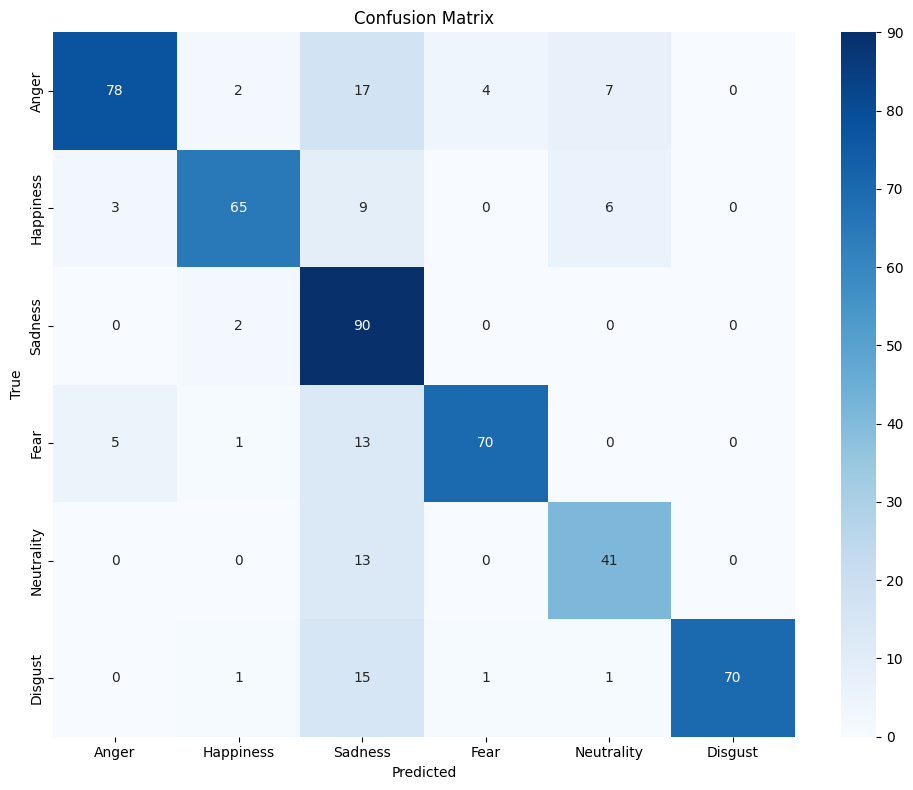


Classification Report:
              precision    recall  f1-score   support

       Anger       0.91      0.72      0.80       108
   Happiness       0.92      0.78      0.84        83
     Sadness       0.57      0.98      0.72        92
        Fear       0.93      0.79      0.85        89
  Neutrality       0.75      0.76      0.75        54
     Disgust       1.00      0.80      0.89        88

    accuracy                           0.81       514
   macro avg       0.85      0.80      0.81       514
weighted avg       0.85      0.81      0.81       514

Anger accuracy: 72.22%
Happiness accuracy: 78.31%
Sadness accuracy: 97.83%
Fear accuracy: 78.65%
Neutrality accuracy: 75.93%
Disgust accuracy: 79.55%


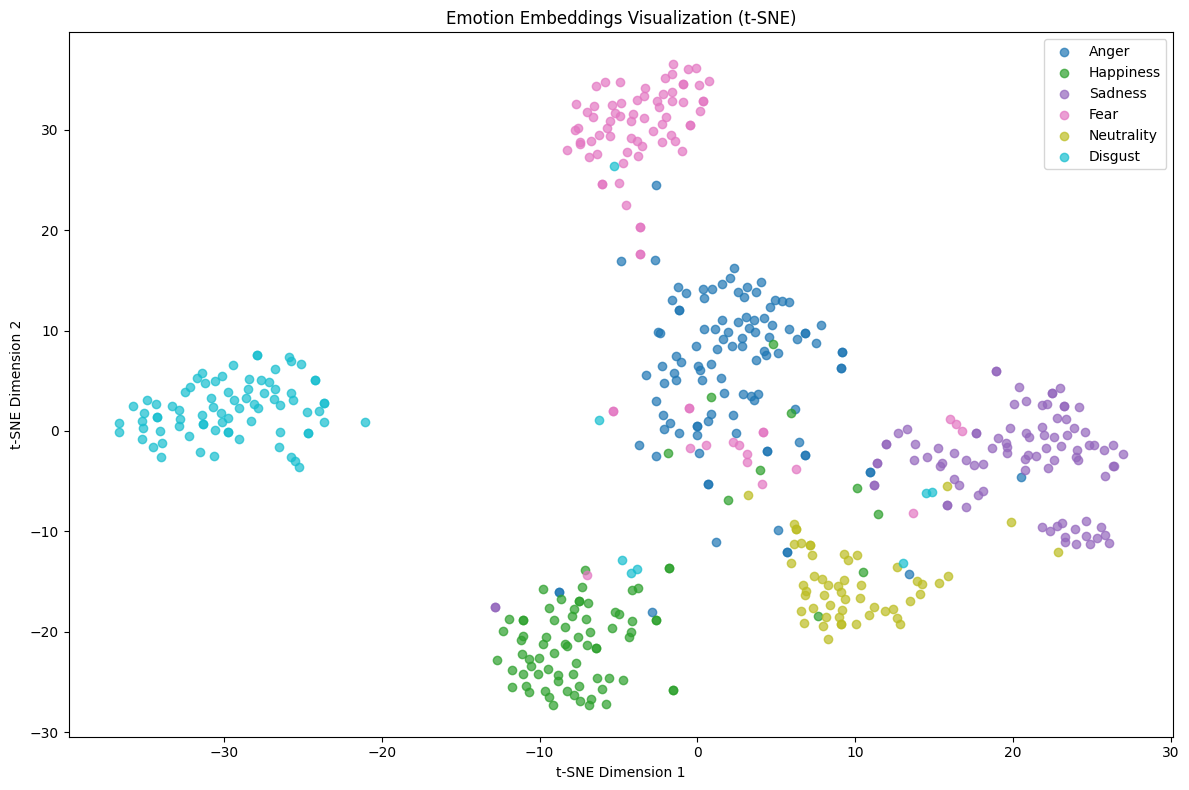

Model saved successfully!
Emotion embeddings saved successfully!

Test on single file:
File: 16b03Ta.wav
Predicted emotion: Sadness, Confidence: 1.00


In [ ]:
# Only proceed with training if we have data
if len(combined_dataset) > 0:
    # Train-test split
    train_size = int(0.8 * len(combined_dataset))
    test_size = len(combined_dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(combined_dataset, [train_size, test_size])

    # Data loaders
    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model
    model = EmotionRecognitionModel(num_emotions=len(emotion_labels)).to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    # Training function
    def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
        model.train()
        training_losses = []
        training_accuracies = []

        for epoch in range(num_epochs):
            running_loss = 0.0
            correct = 0
            total = 0

            for batch_idx, (inputs, labels) in enumerate(train_loader):
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            epoch_loss = running_loss / len(train_loader)
            epoch_accuracy = 100 * correct / total
            training_losses.append(epoch_loss)
            training_accuracies.append(epoch_accuracy)

            if (epoch + 1) % 50 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

        return training_losses, training_accuracies

    # Train the model
    training_losses, training_accuracies = train_model(model, train_loader, criterion, optimizer, num_epochs=10)

    # Plot training progress
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(training_losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(training_accuracies)
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.tight_layout()
    plt.show()

    # Evaluation function
    def evaluate_model(model, test_loader):
        model.eval()
        all_predictions = []
        all_labels = []
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)

                all_predictions.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f'Test Accuracy: {accuracy:.2f}%')

        return np.array(all_predictions), np.array(all_labels)

    # Evaluate the model
    predictions, true_labels = evaluate_model(model, test_loader)

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=emotion_labels, yticklabels=emotion_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

    # Classification report
    print("\nClassification Report:")
    print(classification_report(true_labels, predictions, target_names=emotion_labels))

    # Calculate accuracy per emotion
    emotion_accuracy = []
    for i, emotion in enumerate(emotion_labels):
        emotion_indices = true_labels == i
        if sum(emotion_indices) > 0:
            emotion_acc = (predictions[emotion_indices] == i).mean() * 100
            emotion_accuracy.append(emotion_acc)
            print(f"{emotion} accuracy: {emotion_acc:.2f}%")
        else:
            emotion_accuracy.append(0)
            print(f"{emotion} accuracy: N/A (no samples)")

    # Function to get emotion embeddings (for diffusion model)
    def get_emotion_embeddings(model, data_loader):
        """Extract emotion embeddings from the trained model"""
        model.eval()
        embeddings = []
        emotion_labels_list = []

        with torch.no_grad():
            for inputs, labels in data_loader:
                inputs = inputs.to(device)
                # Get features before the final classification layer
                with torch.no_grad():
                    x = model.conv1(inputs)
                    x = model.bn1(x)
                    x = model.relu(x)
                    x = model.maxpool(x)
                    x = model.layer1(x)
                    x = model.layer2(x)
                    x = model.layer3(x)
                    x = model.layer4(x)
                    x = model.avgpool(x)
                    x = torch.flatten(x, 1)

                embeddings.append(x.cpu().numpy())
                emotion_labels_list.append(labels.numpy())

        embeddings = np.concatenate(embeddings, axis=0)
        emotion_labels_list = np.concatenate(emotion_labels_list, axis=0)

        return embeddings, emotion_labels_list

    # Extract embeddings for visualization
    embeddings, labels = get_emotion_embeddings(model, test_loader)

    # Visualize embeddings using t-SNE
    from sklearn.manifold import TSNE

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Plot embeddings
    plt.figure(figsize=(12, 8))
    colors = plt.cm.tab10(np.linspace(0, 1, len(emotion_labels)))

    for i, emotion in enumerate(emotion_labels):
        mask = labels == i
        plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1],
                   c=[colors[i]], label=emotion, alpha=0.7)

    plt.legend()
    plt.title('Emotion Embeddings Visualization (t-SNE)')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.tight_layout()
    plt.show()

    # Save the trained model
    torch.save(model.state_dict(), '/content/emotion_recognition_model.pth')
    print("Model saved successfully!")

    # Save emotion embeddings for diffusion model
    np.save('/content/emotion_embeddings.npy', embeddings)
    np.save('/content/emotion_labels.npy', labels)
    print("Emotion embeddings saved successfully!")

    # Example of loading the model
    def load_model(model_path):
        model = EmotionRecognitionModel(num_emotions=len(emotion_labels)).to(device)
        model.load_state_dict(torch.load(model_path))
        model.eval()
        return model

    # Example of inference on a single audio file
    def predict_emotion(model, audio_path):
        # Extract mel-spectrogram
        mel_spec = extract_mel_spectrogram(audio_path)
        if mel_spec is None:
            return None, None

        # Convert to tensor and add batch dimension
        mel_spec_tensor = torch.FloatTensor(mel_spec).unsqueeze(0).unsqueeze(0).to(device)

        # Get prediction
        with torch.no_grad():
            output = model(mel_spec_tensor)
            probabilities = torch.softmax(output, dim=1)
            predicted_class = torch.argmax(output, dim=1).item()

        predicted_emotion = emotion_labels[predicted_class]
        confidence = probabilities[0][predicted_class].item()

        return predicted_emotion, confidence

    # Test on a single file from our extracted dataset
    if len(emodb_dataset) > 0:
        test_audio_path = emodb_dataset.data[0]  # Get first file from EmoDB
        predicted_emotion, confidence = predict_emotion(model, test_audio_path)
        print(f"\nTest on single file:")
        print(f"File: {os.path.basename(test_audio_path)}")
        print(f"Predicted emotion: {predicted_emotion}, Confidence: {confidence:.2f}")
else:
    print("No data loaded. Check if datasets are correctly extracted.")

In [ ]:
# Implementation of Diffusion-based Emotion Speech Augmentation
# Based on "A Generation of Enhanced Data by Variational Autoencoders and Diffusion Modeling"

import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchaudio
import librosa
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from pathlib import Path
import random

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Configure GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Parameters
TARGET_SAMPLE_RATE = 22025
MAX_AUDIO_LENGTH = 10  # seconds
HOP_LENGTH = 256
N_FFT = 1024
N_MELS = 80
BATCH_SIZE = 4
LEARNING_RATE = 1e-4
NUM_EPOCHS = 50
DIFFUSION_STEPS = 500
BETA_START = 1e-4
BETA_END = 0.02

# Dataset paths
EMODB_PATH = '/content/extracted_datasets/EmoDB'
RAVDESS_PATH = '/content/extracted_datasets/RAVDESS'

# Emotion labels mapping
emotion_labels = ['Anger', 'Happiness', 'Sadness', 'Fear', 'Neutrality', 'Disgust']

# Load pre-trained emotion recognition model (from previous step)
EMOTION_MODEL_PATH = '/content/emotion_recognition_model.pth'

# Mel-spectrogram extraction function
def extract_mel_spectrogram(audio_path, target_sr=TARGET_SAMPLE_RATE, max_length=MAX_AUDIO_LENGTH):
    """Extract mel-spectrogram from audio file"""
    try:
        # Load audio file
        audio, sr = librosa.load(audio_path, sr=target_sr)

        # Pad or trim audio to fixed length
        target_length = target_sr * max_length
        if len(audio) < target_length:
            audio = np.pad(audio, (0, target_length - len(audio)))
        else:
            audio = audio[:target_length]

        # Extract mel-spectrogram
        mel_spec = librosa.feature.melspectrogram(
            y=audio,
            sr=target_sr,
            n_fft=N_FFT,
            hop_length=HOP_LENGTH,
            n_mels=N_MELS
        )

        # Convert to log scale (dB)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

        # Normalize using Z-score normalization
        mel_spec_normalized = (mel_spec_db - mel_spec_db.mean()) / mel_spec_db.std()

        return mel_spec_normalized

    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None

# Load pre-trained emotion embeddings (from previous step)
def load_emotion_embeddings(embeddings_path, labels_path):
    """Load pre-trained emotion embeddings"""
    try:
        embeddings = np.load(embeddings_path)
        labels = np.load(labels_path)
        return embeddings, labels
    except Exception as e:
        print(f"Error loading emotion embeddings: {e}")
        return None, None


class EmotionEmbeddingModule(nn.Module):
    def __init__(self, embedding_dim=512, emotion_dim=32):  # Changed embedding_dim to 512
        super(EmotionEmbeddingModule, self).__init__()
        # Embedding layers to convert emotion index to vector
        self.emotion_embedding = nn.Embedding(len(emotion_labels), emotion_dim)
        # Projection layers to match desired dimension
        self.projection = nn.Sequential(
            nn.Linear(emotion_dim, 128),
            nn.ReLU(),
            nn.Linear(128, embedding_dim)
        )

    def forward(self, emotion_idx):
        # Get embedding for emotion index
        emotion_emb = self.emotion_embedding(emotion_idx)
        # Project to desired dimension
        emotion_vector = self.projection(emotion_emb)
        return emotion_vector

# Mel-style Encoder
class MelStyleEncoder(nn.Module):
    def __init__(self, in_channels=1, embedding_dim=512):
        super(MelStyleEncoder, self).__init__()

        # Convolutional blocks to extract features
        self.conv_blocks = nn.Sequential(
            # Initial convolution
            nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),

            # Convolutional blocks with increasing channels
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
        )

        # Global average pooling and fully connected layers
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, embedding_dim)

    def forward(self, x):
        # Extract features using convolutional blocks
        x = self.conv_blocks(x)
        # Apply global average pooling
        x = self.avg_pool(x)
        # Flatten and pass through fully connected layer
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Attention Block for Diffusion Model
class AttentionBlock(nn.Module):
    def __init__(self, channels):
        super(AttentionBlock, self).__init__()
        self.channels = channels
        self.mha = nn.MultiheadAttention(channels, 4, batch_first=True)
        self.norm = nn.LayerNorm(channels)
        self.ffn = nn.Sequential(
            nn.Linear(channels, channels * 4),
            nn.GELU(),
            nn.Linear(channels * 4, channels)
        )

    def forward(self, x):
        # Reshape for attention
        b, c, h, w = x.shape
        x_flat = x.reshape(b, c, -1).permute(0, 2, 1)  # [B, H*W, C]

        # Apply self-attention
        norm_x = self.norm(x_flat)
        attention_output, _ = self.mha(norm_x, norm_x, norm_x)
        x_flat = x_flat + attention_output

        # Apply feed-forward network
        norm_x = self.norm(x_flat)
        ffn_output = self.ffn(norm_x)
        x_flat = x_flat + ffn_output

        # Reshape back
        x = x_flat.permute(0, 2, 1).reshape(b, c, h, w)
        return x

# ResNet Block for Diffusion Model
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, time_embedding_dim=512, stride=1, use_attention=False):
        super(ResNetBlock, self).__init__()

        # Time embedding projection
        self.time_mlp = nn.Sequential(
            nn.Linear(time_embedding_dim, out_channels),
            nn.SiLU()
        )

        # Main convolutional path
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

        # Shortcut connection
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

        # Attention if specified
        self.use_attention = use_attention
        if use_attention:
            self.attention = AttentionBlock(out_channels)

    def forward(self, x, t=None):
        # Time embedding
        time_emb = self.time_mlp(t).unsqueeze(-1).unsqueeze(-1)

        # Main path
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        # Add time embedding
        out = out + time_emb

        out = self.conv2(out)
        out = self.bn2(out)

        # Shortcut connection
        out += self.shortcut(x)
        out = self.relu(out)

        # Apply attention if specified
        if self.use_attention:
            out = self.attention(out)

        return out

# Diffusion Model
class DiffusionModel(nn.Module):
    def __init__(self, in_channels=1, base_channels=64, time_embedding_dim=512, emotion_embedding_dim=512):
        super(DiffusionModel, self).__init__()

        # Time embedding
        self.time_embedding = nn.Sequential(
            nn.Linear(1, time_embedding_dim),
            nn.SiLU(),
            nn.Linear(time_embedding_dim, time_embedding_dim)
        )
        # Initial convolution
        self.initial_conv = nn.Conv2d(in_channels, base_channels, kernel_size=7, stride=1, padding=3)

        # Encoder (downsampling)
        self.down1 = ResNetBlock(base_channels, base_channels, time_embedding_dim)
        self.down2 = ResNetBlock(base_channels, base_channels*2, time_embedding_dim, stride=2, use_attention=True)
        self.down3 = ResNetBlock(base_channels*2, base_channels*4, time_embedding_dim, stride=2)
        self.down4 = ResNetBlock(base_channels*4, base_channels*8, time_embedding_dim, stride=2, use_attention=True)

        # Middle
        self.middle1 = ResNetBlock(base_channels*8, base_channels*8, time_embedding_dim)
        self.middle_attn = AttentionBlock(base_channels*8)
        self.middle2 = ResNetBlock(base_channels*8, base_channels*8, time_embedding_dim)

        # Emotion conditioning
        self.emotion_proj = nn.Sequential(
            nn.Linear(emotion_embedding_dim, time_embedding_dim),
            nn.SiLU(),
            nn.Linear(time_embedding_dim, time_embedding_dim)
        )

        # Decoder (upsampling)
        self.up4 = ResNetBlock(base_channels*16, base_channels*4, time_embedding_dim, use_attention=True)
        self.up3 = ResNetBlock(base_channels*8, base_channels*2, time_embedding_dim)
        self.up2 = ResNetBlock(base_channels*4, base_channels, time_embedding_dim, use_attention=True)
        self.up1 = ResNetBlock(base_channels*2, base_channels, time_embedding_dim)

        # Final layers
        self.final_conv = nn.Sequential(
            nn.Conv2d(base_channels, in_channels, kernel_size=3, padding=1),
            nn.Tanh()
        )

        # Upsampling layers
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False)

    def forward(self, x, t, emotion_embedding):
        # Time embedding
        # Cast 't' to float before passing to the time embedding layer
        t_emb = t.unsqueeze(-1).type(torch.float)
        t_emb = self.time_embedding(t_emb)

        # Emotion conditioning
        emotion_emb = self.emotion_proj(emotion_embedding)
        t_emb = t_emb + emotion_emb

        # Initial convolution
        x1 = self.initial_conv(x)

        # Encoder
        x2 = self.down1(x1, t_emb)
        x3 = self.down2(x2, t_emb)
        x4 = self.down3(x3, t_emb)
        x5 = self.down4(x4, t_emb)

        # Middle
        x5 = self.middle1(x5, t_emb)
        x5 = self.middle_attn(x5)
        x5 = self.middle2(x5, t_emb)

        # Decoder with skip connections
        x = torch.cat([x5, x5], dim=1)
        x = self.up4(x, t_emb)
        x = self.upsample(x)

        x = torch.cat([x, x4], dim=1)
        x = self.up3(x, t_emb)
        x = self.upsample(x)

        x = torch.cat([x, x3], dim=1)
        x = self.up2(x, t_emb)
        x = self.upsample(x)

        x = torch.cat([x, x2], dim=1)
        x = self.up1(x, t_emb)

        # Final convolution
        x = self.final_conv(x)

        return x

# Diffusion Process
class DiffusionProcess:
    def __init__(self, steps=DIFFUSION_STEPS, beta_start=BETA_START, beta_end=BETA_END, device=device):
        """
        Diffusion process for generating new mel-spectrograms

        Args:
            steps: Number of diffusion steps
            beta_start: Starting noise schedule value
            beta_end: Ending noise schedule value
            device: Device to run the process on
        """
        self.steps = steps
        self.device = device

        # Define beta schedule
        self.betas = torch.linspace(beta_start, beta_end, steps).to(device)

        # Calculate alphas, cumulative products
        self.alphas = 1.0 - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)
        self.alphas_cumprod_prev = F.pad(self.alphas_cumprod[:-1], (1, 0), value=1.0)

        # Calculations for diffusion q(x_t | x_{t-1})
        self.sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod)
        self.sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - self.alphas_cumprod)

        # Calculations for posterior q(x_{t-1} | x_t, x_0)
        self.posterior_variance = self.betas * (1.0 - self.alphas_cumprod_prev) / (1.0 - self.alphas_cumprod)

    def add_noise(self, x_0, t):
        """
        Add noise to the input at timestep t

        Args:
            x_0: Original input
            t: Timestep

        Returns:
            Noised input
        """
        noise = torch.randn_like(x_0)
        sqrt_alphas_cumprod_t = self.sqrt_alphas_cumprod[t].view(-1, 1, 1, 1)
        sqrt_one_minus_alphas_cumprod_t = self.sqrt_one_minus_alphas_cumprod[t].view(-1, 1, 1, 1)

        return sqrt_alphas_cumprod_t * x_0 + sqrt_one_minus_alphas_cumprod_t * noise, noise

    def sample_timesteps(self, batch_size):
        """Sample random timesteps for a batch"""
        return torch.randint(0, self.steps, (batch_size,)).to(self.device)

    @torch.no_grad()
    def sample(self, model, n_samples, emotion_embedding, shape):
        """
        Sample new mel-spectrograms from noise

        Args:
            model: Diffusion model
            n_samples: Number of samples to generate
            emotion_embedding: Emotion embeddings to condition on
            shape: Shape of the output mel-spectrograms

        Returns:
            Generated mel-spectrograms
        """
        model.eval()

        # Start from pure noise
        x = torch.randn(n_samples, *shape).to(self.device)

        # Gradually denoise
        for t in tqdm(reversed(range(self.steps)), desc="Sampling", total=self.steps):
            t_batch = torch.full((n_samples,), t, device=self.device, dtype=torch.long)

            # Predict noise
            predicted_noise = model(x, t_batch, emotion_embedding)

            # Calculate parameters for denoising step
            alpha = self.alphas[t]
            alpha_cumprod = self.alphas_cumprod[t]
            beta = self.betas[t]

            # No noise for the last step (t=0)
            noise = torch.randn_like(x) if t > 0 else torch.zeros_like(x)

            # Denoising formula
            x = (1 / torch.sqrt(alpha)) * (x - (beta / torch.sqrt(1 - alpha_cumprod)) * predicted_noise) + torch.sqrt(beta) * noise

        model.train()
        return x

# Dataset for Mel-spectrograms
class MelSpectrogramDataset(Dataset):
    def __init__(self, emodb_path, ravdess_path):
        self.data = []
        self.emotion_labels = []

        # Load EmoDB data
        self._load_emodb(emodb_path)

        # Load RAVDESS data
        self._load_ravdess(ravdess_path)

    def _load_emodb(self, emodb_path):
        """Load EmoDB dataset"""
        emotion_map = {
            'W': 'Anger',
            'L': 'Neutrality',
            'E': 'Disgust',
            'A': 'Fear',
            'F': 'Happiness',
            'T': 'Sadness'
        }

        # Walk through the EmoDB directory
        for root, _, files in os.walk(emodb_path):
            for file in files:
                if file.endswith('.wav'):
                    # Extract emotion from filename (EmoDB naming convention)
                    emotion_code = file[5]  # 7th character in EmoDB filename
                    if emotion_code in emotion_map:
                        emotion = emotion_map[emotion_code]
                        if emotion in emotion_labels:
                            file_path = os.path.join(root, file)
                            mel_spec = extract_mel_spectrogram(file_path)

                            if mel_spec is not None:
                                self.data.append(mel_spec)
                                self.emotion_labels.append(emotion_labels.index(emotion))

    def _load_ravdess(self, ravdess_path):
        """Load RAVDESS dataset"""
        emotion_map = {
            '01': 'Neutrality',  # Calm mapped to Neutrality
            '02': 'Happiness',
            '03': 'Sadness',
            '04': 'Anger',
            '05': 'Fear',
            '07': 'Disgust'  # Disgust without surprise
        }

        # Walk through the RAVDESS directory
        for root, _, files in os.walk(ravdess_path):
            for file in files:
                if file.endswith('.wav'):
                    # Extract emotion from filename
                    parts = file.split('-')
                    if len(parts) >= 3:
                        emotion_code = parts[2]
                        if emotion_code in emotion_map:
                            emotion = emotion_map[emotion_code]
                            if emotion in emotion_labels:
                                file_path = os.path.join(root, file)
                                mel_spec = extract_mel_spectrogram(file_path)

                                if mel_spec is not None:
                                    self.data.append(mel_spec)
                                    self.emotion_labels.append(emotion_labels.index(emotion))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.data[idx]).unsqueeze(0), self.emotion_labels[idx]

# Training function for Diffusion Model
# ... (other imports)
from torch.utils.data import Dataset, DataLoader

# ... (other code)

# Training function for Diffusion Model
def train_diffusion_model(diffusion_model, diffusion_process, dataloader, emotion_module, optimizer, num_epochs):
    """Train the diffusion model"""
    diffusion_model.train()
    losses = []

    # Gradient Accumulation Steps
    accumulation_steps = 4  # Adjust as needed

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        progress_bar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")

        for step, (mel_specs, emotion_indices) in enumerate(progress_bar):
            mel_specs = mel_specs.to(device)
            emotion_indices = emotion_indices.to(device)
            # Get emotion embeddings
            emotion_embedding = emotion_module(emotion_indices)

            # Sample random timesteps
            t = diffusion_process.sample_timesteps(mel_specs.shape[0])

            # Add noise to the mel-specs
            x_noisy, noise = diffusion_process.add_noise(mel_specs, t)

            # Predict the noise
            predicted_noise = diffusion_model(x_noisy, t, emotion_embedding)

            # Calculate loss
            loss = F.mse_loss(predicted_noise, noise)

            # Backpropagation with gradient accumulation
            loss = loss / accumulation_steps  # Scale loss by accumulation steps
            loss.backward()

            # Update parameters every accumulation_steps
            if (step + 1) % accumulation_steps == 0:
                optimizer.step()
                optimizer.zero_grad()  # Reset gradients after updating parameters

            # Update progress bar
            epoch_loss += loss.item()
            progress_bar.set_postfix(loss=epoch_loss/(step+1))

        # ... (rest of the function)

        # Record epoch loss
        avg_epoch_loss = epoch_loss / len(dataloader)
        losses.append(avg_epoch_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_epoch_loss:.6f}")

        # Save checkpoint every 50 epochs
        if (epoch+1) % 50 == 0 or epoch == num_epochs-1:
            checkpoint = {
                'model_state_dict': diffusion_model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'epoch': epoch,
                'loss': avg_epoch_loss
            }
            torch.save(checkpoint, f'/content/diffusion_model_epoch_{epoch+1}.pth')

    return losses

# Function to generate new mel-spectrograms
def generate_mel_spectrograms(diffusion_model, diffusion_process, emotion_module, n_samples=5):
    """Generate new mel-spectrograms for each emotion"""
    generated_mel_specs = {}

    for emotion_idx, emotion in enumerate(emotion_labels):
        print(f"Generating {n_samples} mel-spectrograms for {emotion}...")

        # Create emotion indices
        emotion_indices = torch.full((n_samples,), emotion_idx, device=device)

        # Get emotion embeddings
        emotion_embedding = emotion_module(emotion_indices)

        # Generate mel-spectrograms
        generated_samples = diffusion_process.sample(
            diffusion_model,
            n_samples,
            emotion_embedding,
            shape=(1, N_MELS, 862)  # Typical shape for our mel-spectrograms
        )

        generated_mel_specs[emotion] = generated_samples.cpu().numpy()

    return generated_mel_specs

# Function to convert mel-spectrogram back to audio
def mel_to_audio(mel_spec, sr=TARGET_SAMPLE_RATE, n_fft=N_FFT, hop_length=HOP_LENGTH):
    """Convert mel-spectrogram back to audio"""
    # Convert from normalized to decibels
    mel_spec_db = mel_spec * mel_spec.std() + mel_spec.mean()

    # Convert from decibels to power
    mel_spec_power = librosa.db_to_power(mel_spec_db)

    # Mel to linear spectrogram
    spec = librosa.feature.inverse.mel_to_stft(
        mel_spec_power,
        sr=sr,
        n_fft=n_fft
    )

    # Inverse STFT
    audio = librosa.griffinlim(
        spec,
        hop_length=hop_length,
        n_iter=32
    )

    return audio

# Function to save generated audio
def save_generated_audio(generated_mel_specs, output_dir='/content/generated_audio'):
    """Save generated mel-spectrograms as audio files"""
    os.makedirs(output_dir, exist_ok=True)

    for emotion, mel_specs in generated_mel_specs.items():
        emotion_dir = os.path.join(output_dir, emotion)
        os.makedirs(emotion_dir, exist_ok=True)

        for i, mel_spec in enumerate(mel_specs):
            # Convert to audio
            audio = mel_to_audio(mel_spec[0])

            # Save as WAV file
            output_path = os.path.join(emotion_dir, f'{emotion}_generated_{i+1}.wav')
            librosa.output.write_wav(output_path, audio, sr=TARGET_SAMPLE_RATE)

            print(f"Saved {output_path}")

# Main function
def main():
    print("Starting Diffusion-based Emotion Speech Augmentation...")

    # Check if paths exist
    if not os.path.exists(EMODB_PATH):
        print(f"EmoDB path not found: {EMODB_PATH}")
        return

    if not os.path.exists(RAVDESS_PATH):
        print(f"RAVDESS path not found: {RAVDESS_PATH}")
        return

    # Load dataset
    print("Loading dataset...")
    dataset = MelSpectrogramDataset(EMODB_PATH, RAVDESS_PATH)
    dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

    print(f"Dataset loaded with {len(dataset)} samples")

    # Initialize models
    print("Initializing models...")
    emotion_module = EmotionEmbeddingModule().to(device)
    diffusion_model = DiffusionModel().to(device)
    diffusion_process = DiffusionProcess()

    # Initialize optimizer
    optimizer = optim.Adam(
        list(diffusion_model.parameters()) + list(emotion_module.parameters()),
        lr=LEARNING_RATE
    )

    # Train the diffusion model
    print("Training diffusion model...")
    losses = train_diffusion_model(
        diffusion_model,
        diffusion_process,
        dataloader,
        emotion_module,
        optimizer,
        NUM_EPOCHS
    )

    # Plot training losses
    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.title('Diffusion Model Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.savefig('/content/diffusion_training_loss.png')
    plt.show()

    # Generate new mel-spectrograms
    print("Generating new mel-spectrograms...")
    generated_mel_specs = generate_mel_spectrograms(
        diffusion_model,
        diffusion_process,
        emotion_module
    )

    # Save generated audio
    print("Saving generated audio...")
    save_generated_audio(generated_mel_specs)

    print("Done!")

if __name__ == "__main__":
    main()

Using device: cuda
Starting Diffusion-based Emotion Speech Augmentation...
Loading dataset...
Dataset loaded with 2568 samples
Initializing models...
Training diffusion model...


Epoch 1/50:   0%|          | 0/642 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 17.72 GiB. GPU 0 has a total capacity of 14.74 GiB of which 12.21 GiB is free. Process 128831 has 2.53 GiB memory in use. Of the allocated memory 1.02 GiB is allocated by PyTorch, and 1.38 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)